In [24]:
%matplotlib notebook
import csv
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import PolynomialFeatures

In [135]:
data = loadmat('ex5data1.mat')
y = data['y']
x = data['X']
yval = data['yval']
xval = data['Xval']
ytest = data['ytest']
xtest = data['Xtest']
th = np.ones((2,1))
x = np.insert(x,0,np.ones(len(x)),axis=1)

In [141]:
def coste(th,x,y,reg = 0):
    m = x.shape[0]
    return (1/(2*m)) * np.sum(np.square(np.dot(x,th) - y)) + (reg/(2*m)) * np.sum(np.square(th[1:])) 
coste(th,x,y)

303.9515255535976

In [140]:
def gradiente(th,x,y,reg=0):
    t0 = np.sum((np.ravel(np.dot(x, th)-y)) * x[:,0])/len(x)
    t1 = np.sum((np.dot(x, th)-y) * x[:,1:])/len(x) + reg * np.ravel(th[1:])/len(x)
    return np.append(t0,t1)
gradiente(th,x,y)

array([-15.30301567, 598.16741084])

In [138]:
result = opt.minimize(fun=coste, x0=th, args=(x, y))
result

      fun: 936.4435889312056
 hess_inv: array([[0.08595355, 0.00051726],
       [0.00051726, 0.00010128]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 1.12175894e+01, -6.93164078e-09])

<IPython.core.display.Javascript object>


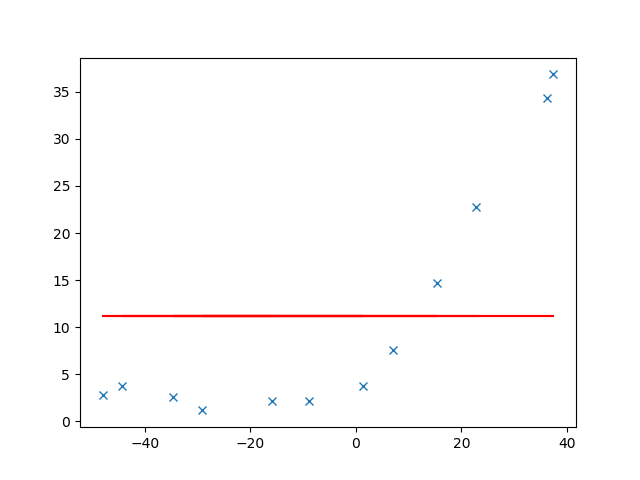

In [143]:
plt.plot()
plt.plot(x[:,1], y, 'x')
plt.plot(x[:,1],result.x[0]+result.x[1]*x[:,1],"r")